University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [3]:
df_dict = {}
folder_path = '../dat/gain-comparison/gain-comp/avg_gain/'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[2].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        #print(key)
        df_dict[key] = df

#print(df_dict['Berlin Hbf'])

In [5]:
df_dict = read_data('../dat/gain-comparison/gain-comp/avg_gain')
cities = list(df_dict.keys())
cities.sort()

Berlin Hbf
Bremen Hbf
Dortmund Hbf
Dresden Hbf
Duesseldorf Hbf
Duisburg Hbf
Erfurt Hbf
Essen Hbf
Hamburg Hbf
Hannover Hbf
Karlsruhe Hbf
Kiel Hbf
Koeln Hbf
Leipzig Hbf
Magdeburg Hbf
Mainz Hbf
Muenchen Hbf
Nuernberg Hbf
Potsdam Hbf
Saarbruecken Hbf
Schwerin Hbf
Stuttgart Hbf
Wiesbaden Hbf


In [3]:
df_mean_delays = get_mean_delays(df_dict)['avg_gain']
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array

## Mean Delay for each switch time

In [6]:
switch_times_array = list(range(1,61,1))
empty = pd.DataFrame(columns=['switch_times', 'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
empty.switch_times = switch_times_array
empty['mean_delay'] = [[] for _ in range(60)]
empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0


#for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
#    empty[column] = [np.array([]) for _ in range(60)]
#display(empty.head(2))

# -------------------

delay_matrix = [[] for _ in range(60)]

# data processing
for key, df in df_dict.items():
    
    #display(df.head(2))
    for irow, row in df.iterrows():
        
        #print(row)

        for i, minute in enumerate(row['switch time']):
            
    
            delay = row['delay'][i]
            #print(empty.loc[minute-1, 'mean_delay'])
            #print(type(empty.loc[minute-1, 'mean_delay']))


            #empty.loc[minute-1, 'mean_delay'].append(delay)
            delay_matrix[int(minute-1)].append(delay)

            #print(empty.loc[minute-1, 'mean_delay'])
            

            # Fill the reachable columns
            case = row['reachable'][i]
            if case == 1:
                empty.loc[minute-1, 'reachable1'] += 1
            elif case == 2:
                empty.loc[minute-1, 'reachable2'] += 1
            elif case == 3:
                empty.loc[minute-1, 'reachable3'] += 1
            
            #display(empty)
            #break
   
        #break

means = []
medians = []
for minute in delay_matrix:
    means.append(np.mean(minute).round(2))
    medians.append(np.median(minute).round(2))

#print(means)
empty['mean_delay'] = means
empty['median_delay'] = medians
df_mean_delays = empty

## Mean delay at destination

In [6]:
empty = pd.DataFrame(columns=cities, index=cities)

# Data processing

df_mean = empty.copy()
df_median = empty.copy()

for key, df in df_dict.items():
    #print(key)
    #display(df.head(2))
    df["meanDelay"] =df["delay"].apply(np.mean)
    df["medianDelay"] = df["delay"].apply(np.median)
    array_mean = df["delay"].apply(np.nanmean).round()
    array_median = df["delay"].apply(np.median)
    #print(key)
    #print(key, array_mean)
    df_mean.loc[key] = array_mean
    df_median.loc[key] = array_median
    

    #break

df_mean = df_mean.fillna(np.nan)

c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\algorithms.py:1814: RuntimeWarning: Mean of empty slice
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\jb\AppData\Local\Programs\Pyt

In [7]:
df_mean

,Berlin Hbf,Bremen Hbf,Dortmund Hbf,Dresden Hbf,Duesseldorf Hbf,Duisburg Hbf,Erfurt Hbf,Essen Hbf,Hamburg Hbf,Hannover Hbf,...,Leipzig Hbf,Magdeburg Hbf,Mainz Hbf,Muenchen Hbf,Nuernberg Hbf,Potsdam Hbf,Saarbruecken Hbf,Schwerin Hbf,Stuttgart Hbf,Wiesbaden Hbf
Berlin Hbf,NaN,NaN,33.0,NaN,31.0,31.0,NaN,35.0,NaN,NaN,...,NaN,NaN,32.0,NaN,NaN,NaN,50.0,NaN,28.0,27.0
Bremen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,74.0,45.0,44.0,NaN,54.0,NaN,49.0,54.0
Dortmund Hbf,28.0,NaN,NaN,18.0,NaN,NaN,23.0,NaN,NaN,NaN,...,27.0,50.0,NaN,30.0,28.0,NaN,NaN,52.0,31.0,NaN
Dresden Hbf,NaN,NaN,25.0,NaN,25.0,24.0,NaN,28.0,NaN,NaN,...,NaN,NaN,41.0,NaN,NaN,NaN,31.0,NaN,26.0,116.0
Duesseldorf Hbf,29.0,NaN,NaN,24.0,NaN,NaN,21.0,NaN,34.0,28.0,...,23.0,59.0,NaN,32.0,29.0,2.0,NaN,53.0,31.0,NaN
Duisburg Hbf,29.0,NaN,NaN,24.0,NaN,NaN,22.0,NaN,NaN,NaN,...,23.0,62.0,NaN,33.0,31.0,2.0,NaN,55.0,31.0,NaN
Erfurt Hbf,NaN,NaN,30.0,NaN,28.0,27.0,NaN,32.0,NaN,NaN,...,NaN,NaN,33.0,NaN,NaN,NaN,33.0,NaN,26.0,29.0
Essen Hbf,27.0,NaN,NaN,23.0,NaN,NaN,21.0,NaN,NaN,NaN,...,23.0,62.0,NaN,29.0,25.0,2.0,NaN,47.0,31.0,NaN
Hamburg Hbf,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.0,26.0,27.0,NaN,64.0,NaN,30.0,31.0
Hannover Hbf,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.0,26.0,NaN,NaN,64.0,NaN,28.0,32.0


In [8]:
df_mean.drop('Potsdam Hbf', inplace=True)
del df_mean['Potsdam Hbf']

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


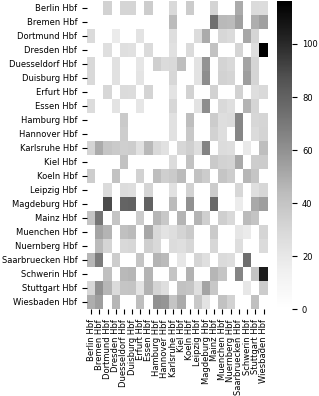

In [9]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))

nan_color = 'lightgrey'


plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
second_highest = data_sorted[1]
min_data = data_sorted[-1]

heatmap = sns.heatmap(df_mean, annot=False, cmap='Greys', mask=df_mean.isna(), cbar=True) # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_greys.pdf", format="pdf")

plt.show()

                  Berlin Hbf  Bremen Hbf  Dortmund Hbf  Dresden Hbf  \
Berlin Hbf               NaN         NaN          33.0          NaN   
Bremen Hbf               NaN         NaN           NaN          NaN   
Dortmund Hbf            28.0         NaN           NaN         18.0   
Dresden Hbf              NaN         NaN          25.0          NaN   
Duesseldorf Hbf         29.0         NaN           NaN         24.0   
Duisburg Hbf            29.0         NaN           NaN         24.0   
Erfurt Hbf               NaN         NaN          30.0          NaN   
Essen Hbf               27.0         NaN           NaN         23.0   
Hamburg Hbf              NaN         NaN           NaN          NaN   
Hannover Hbf             NaN         NaN           NaN          NaN   
Karlsruhe Hbf           32.0        50.0          39.0         37.0   
Kiel Hbf                 NaN         NaN           NaN          NaN   
Koeln Hbf               35.0         NaN           NaN         41.0   
Leipzi

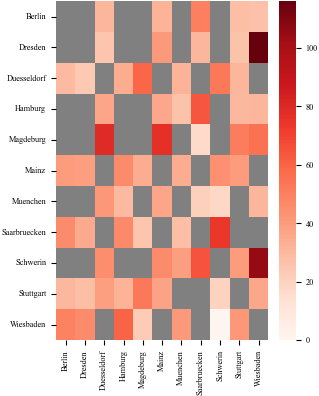

In [10]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))
plt.rcParams['font.serif'] = 'Times New Roman'  # Or another available font
plt.rcParams['font.family'] = 'serif'
#nan_color = 'lightgrey'

print(df_mean)
state_capitals = [
    "Berlin Hbf", "Hamburg Hbf", "Muenchen Hbf", "Stuttgart Hbf", 
    "Duesseldorf Hbf", "Mainz Hbf", "Wiesbaden Hbf", "Saarbruecken Hbf", 
    "Schwerin Hbf", "Dresden Hbf", "Magdeburg Hbf", 
]

# Replace ' Hbf' from the state capitals
cleaned_capitals = [city.replace(' Hbf', '') for city in state_capitals]

# Replace ' Hbf' in DataFrame indices and columns
df_mean.index = df_mean.index.str.replace(' Hbf', '')
df_mean.columns = df_mean.columns.str.replace(' Hbf', '')

# Filter the DataFrame to only include the state capitals
df_filtered = df_mean.loc[cleaned_capitals, cleaned_capitals]

# Sort the indices and columns alphabetically
df_done = df_filtered.sort_index().sort_index(axis=1)
print(df_done)
plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
#data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
#second_highest = data_sorted[1]
#min_data = data_sorted[-1]

cmap = sns.color_palette("Reds", as_cmap=True)
cmap.set_bad('gray')  # Set color for NaN values

# Plot the heatmap

heatmap = sns.heatmap(df_done, annot=False, cmap=cmap, cbar=True, 
                      vmin=0, vmax=df_mean.max().max())  # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_reds.pdf", format="pdf")

plt.show()